# Data Exploration of the NEEP Cold Climate Air-Source Heat Pump Product Listing

[Here is the Source of the data](http://www.neep.org/initiatives/high-efficiency-products/emerging-technologies/ashp/cold-climate-air-source-heat-pump) with further explanation.

In [ ]:
import pandas as pd
import numpy as np
# import matplotlib pyplot commands
from matplotlib.pyplot import *
# Show Plots in the Notebook
%matplotlib inline
 
# 'style' the plot like fivethirtyeight.com website
style.use('bmh')

import seaborn as sns
import altair as alt

In [2]:
rcParams['figure.figsize']= (9, 5)   # set Chart Size
rcParams['font.size'] = 14            # set Font size in Chart

In [3]:
df = pd.read_excel('neep_2018-07-12.xlsx', skiprows=6)
df.head()

Manufacturer Brand \n(if applicable)  \
0  Amana Heating and air Conditioning                   Amana   
1  Amana Heating and air Conditioning                   Amana   
2  Amana Heating and air Conditioning                   Amana   
3  Amana Heating and air Conditioning                   Amana   
4                   American Standard       American Standard   

                Model Name  AHRI Certificate No.  AHRI Type  \
0                   AVZC20              10324704  HRCU-A-CB   
1                   AVZC20              10324705  HRCU-A-CB   
2                   AVZC20              10324706  HRCU-A-CB   
3                   AVZC20              10324707  HRCU-A-CB   
4  AccuComfort Platinum 20               6749789  HRCU-A-CB   

  Outdoor Unit Model             Indoor Unit Model(s)  \
0       AVZC200241A*   CA*F3642*6D*+MBVC1200**-1A*+TX   
1       AVZC200361A*  CA*F3743*6D*+MBVC1600**-1A*+TX    
2       AVZC200481A*   CA*F4961*6D*+MBVC2000**-1A*+TX   
3       AVZC200601A*   CA*F4961*6D*+MBVC2000**-1A*+TX   
4         4A6V0024A1                     *AM8C0B30V21   

   Cooling Capacity (Btuh)  EER (@ 95°F)   SEER         ...          \
0                  23400.0         13.00  21.00         ...           
1                  35400.0         14.00  21.00         ...           
2                  46500.0         13.00  20.00         ...           
3                  52500.0         12.50  20.00         ...           
4                  24200.0         13.75  19.25         ...           

   Minimum Capactity X°F Unnamed: 55 Maximum Capacity X°F  \
0                    NaN         NaN                  NaN   
1                    NaN         NaN                  NaN   
2                    NaN         NaN                  NaN   
3                    NaN         NaN                  NaN   
4                    NaN         NaN                  NaN   

  Input Power at Min. Capacity X°F Unnamed: 58  \
0                              NaN         NaN   
1                              NaN         NaN   
2                              NaN         NaN   
3                              NaN         NaN   
4                              NaN         NaN   

   Input Power at Max. Capacity X°F  COP at Min. Capacity X°F  Unnamed: 61  \
0                               NaN                       NaN          NaN   
1                               NaN                       NaN          NaN   
2                               NaN                       NaN          NaN   
3                               NaN                       NaN          NaN   
4                               NaN                       NaN          NaN   

   COP at Max. Capacity X°F  Date added to List  
0                       NaN                 NaN  
1                       NaN                 NaN  
2                       NaN                 NaN  
3                       NaN                 NaN  
4                       NaN                 NaN  

[5 rows x 64 columns]

In [4]:
orig_cols = df.columns
orig_cols
# Make a list of the Excel column labels
chars = [chr(x) for x in range(65, 65+26)]
excel_cols = chars
for i in range(2):
    new_set = [chars[i] + chr(x) for x in range(65, 65+26)]
    excel_cols += new_set

In [5]:
df.columns = excel_cols[:len(orig_cols)]
df.head()

A                  B  \
0  Amana Heating and air Conditioning              Amana   
1  Amana Heating and air Conditioning              Amana   
2  Amana Heating and air Conditioning              Amana   
3  Amana Heating and air Conditioning              Amana   
4                   American Standard  American Standard   

                         C         D          E             F  \
0                   AVZC20  10324704  HRCU-A-CB  AVZC200241A*   
1                   AVZC20  10324705  HRCU-A-CB  AVZC200361A*   
2                   AVZC20  10324706  HRCU-A-CB  AVZC200481A*   
3                   AVZC20  10324707  HRCU-A-CB  AVZC200601A*   
4  AccuComfort Platinum 20   6749789  HRCU-A-CB    4A6V0024A1   

                                 G        H      I      J ...   BC   BD  BE  \
0   CA*F3642*6D*+MBVC1200**-1A*+TX  23400.0  13.00  21.00 ...  NaN  NaN NaN   
1  CA*F3743*6D*+MBVC1600**-1A*+TX   35400.0  14.00  21.00 ...  NaN  NaN NaN   
2   CA*F4961*6D*+MBVC2000**-1A*+TX  46500.0  13.00  20.00 ...  NaN  NaN NaN   
3   CA*F4961*6D*+MBVC2000**-1A*+TX  52500.0  12.50  20.00 ...  NaN  NaN NaN   
4                     *AM8C0B30V21  24200.0  13.75  19.25 ...  NaN  NaN NaN   

   BF  BG  BH  BI  BJ  BK   BL  
0 NaN NaN NaN NaN NaN NaN  NaN  
1 NaN NaN NaN NaN NaN NaN  NaN  
2 NaN NaN NaN NaN NaN NaN  NaN  
3 NaN NaN NaN NaN NaN NaN  NaN  
4 NaN NaN NaN NaN NaN NaN  NaN  

[5 rows x 64 columns]

In [6]:
# Print the column map and make a dictionary for mapping excel column name
# to verbose name
col_map = {}
for ex, orig in zip(df.columns, orig_cols):
    orig = orig.replace('\n', ' ')
    col_map[ex] = orig
    print(f"{ex}: {orig}")

A: Manufacturer
B: Brand  (if applicable)
C: Model Name
D: AHRI Certificate No.
E: AHRI Type
F: Outdoor Unit Model
G: Indoor Unit Model(s)
H: Cooling Capacity (Btuh)
I: EER (@ 95°F)
J: SEER
K: HSPF (Region IV):
L: ENERGY STAR Certified
M: Centrally Ducted or Ductless
N: If Ductless,  Multi-zone or Single-zone?
O: Ductless Indoor Type
P: Unnamed: 15
Q: Minimum Capacity 47°F
R: Rated Capacity 47°F
S: Maximum Capacity 47°F
T: Input Power at Min. Capcaity 47°F
U: Rated Input Power 47°F
V: Input Power at Max. Capacity 47°F
W: COP at Min. Capacity 47°F
X: COP at Rated Capacity 47°F
Y: COP at Max. Capacity 47°F
Z: Unnamed: 25
AA: Minimum Capacity 17°F
AB: Rated Capacity 17°F
AC: Maximum Capacity 17°F
AD: Input Power at Min. Capacity 17°F
AE: Input Power at Rated Capacity 17°F
AF: Input Power at Max. Capacity 17°F
AG: COP at Min. Capacity 17°F
AH: COP at Rated Capacity 17°F
AI: COP at Max. Capacity 17°F
AJ: Unnamed: 35
AK: Minimum Capacity 5°F
AL: Unnamed: 37
AM: Maximum Capacity 5°F
AN: Input

In [8]:
df.K.describe()

count    1049.000000
mean       10.917969
std         1.013414
min        10.000000
25%        10.000000
50%        10.500000
75%        11.300000
max        15.000000
Name: K, dtype: float64

/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


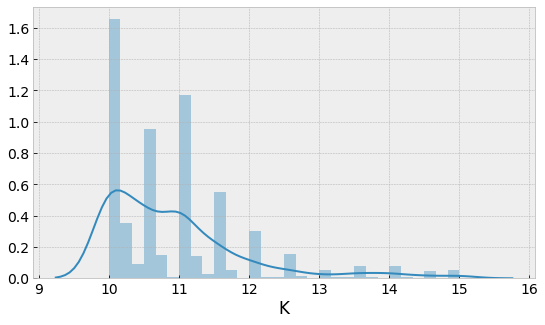

In [21]:
# HSPF
sns.distplot(df.K, bins=30)

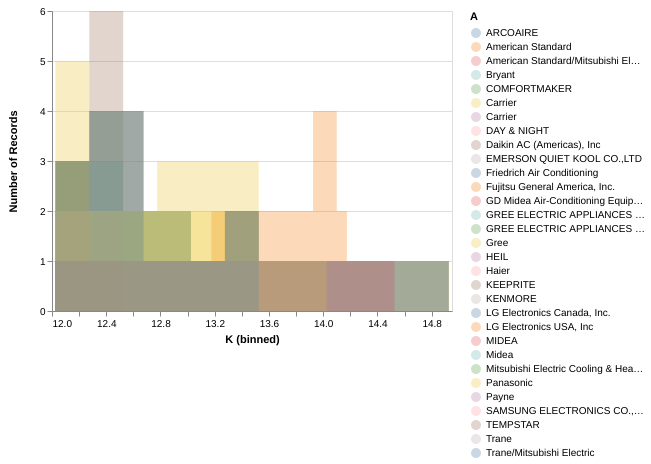

In [22]:
alt.Chart(df.query('K >= 12')).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('K:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('count()', stack=None),
    alt.Color(
        'A:N',
    ),
    tooltip = 'A'
).interactive()

In [23]:
# save data to file to save space in notebook
#df_url = 'df.json'
#df.to_json(df_url, orient='records')

Text(0,0.5,'HSPF')

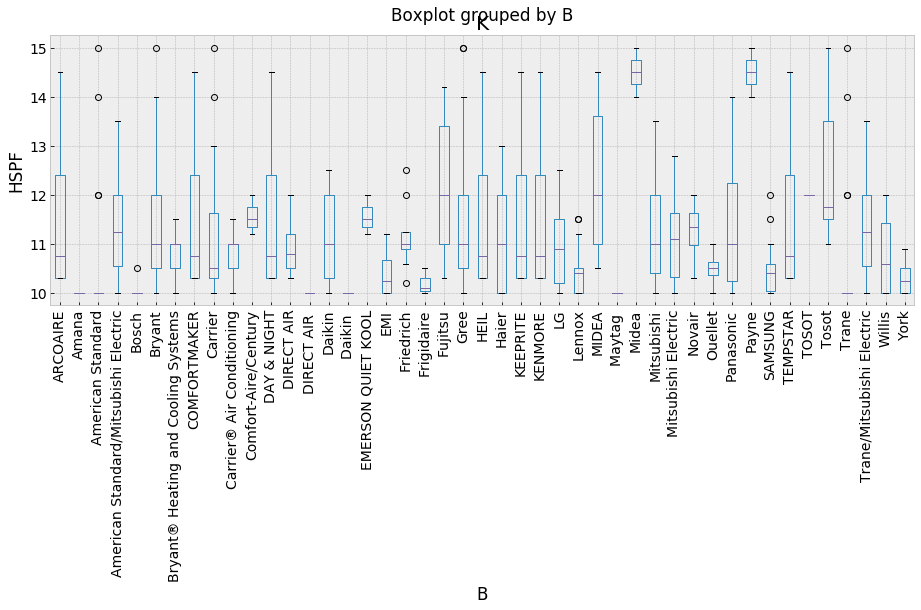

In [24]:
df.boxplot(column='K', by='B', rot=90, figsize=(15,5))
ylabel('HSPF')

Text(0,0.5,'HSPF')

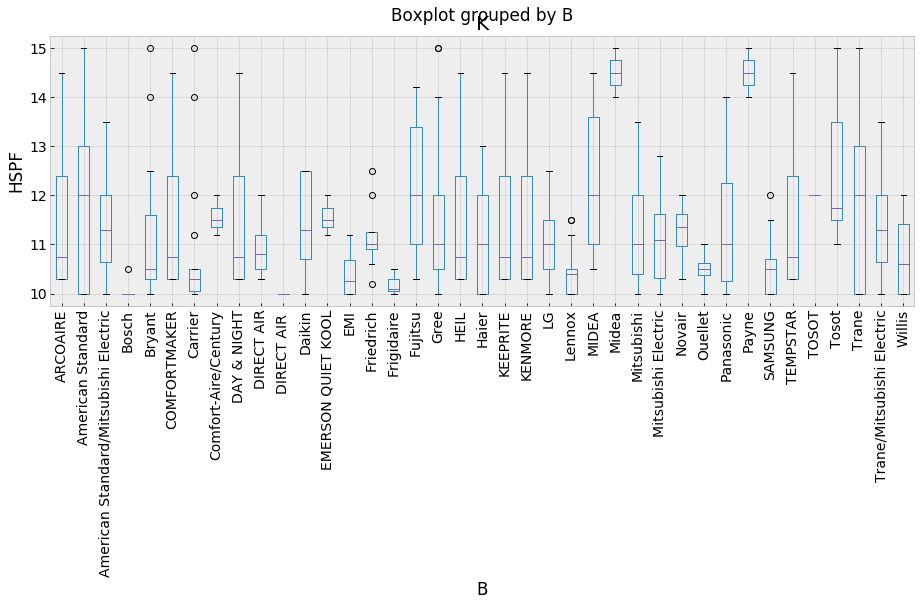

In [25]:
# Just Ductless
df.query('M != "Centrally Ducted"').boxplot(column='K', by='B', rot=90, figsize=(15,5))
ylabel('HSPF')

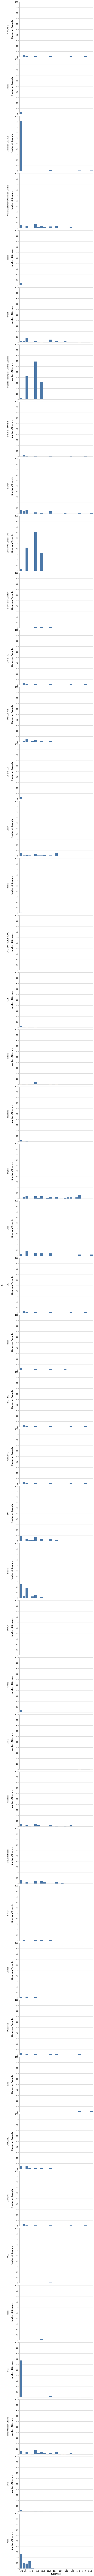

In [26]:
alt.themes.enable('default')
c = alt.Chart(df).mark_bar().encode(
    alt.X('K:Q', bin=alt.Bin(maxbins=30)),
    y = 'count()',
    row = 'B:N'
)
c

In [27]:
len(df)

1049

In [28]:
# Low Temperature Rating Point, deg F
# Only shows non-null values
df.BB.value_counts()

-13      52
-22      24
-5       17
-15      15
-4       10
-5°F     10
-13°F     9
0         7
-5F       1
-4°F      1
0°F       1
-13°      1
n/A       1
Name: BB, dtype: int64

In [29]:
# Max Input Power at 17 deg F
df.AF.describe()

# BAD Data Error here

count    1049.000000
mean       10.485637
std       138.913019
min         0.640000
25%         2.060000
50%         2.934620
75%         3.759503
max      2603.000000
Name: AF, dtype: float64

In [30]:
max17 = df.query('AF < 20').AF

In [31]:
max17.describe()

count    1046.000000
mean        3.050128
std         1.331349
min         0.640000
25%         2.060000
50%         2.930000
75%         3.742498
max         9.525000
Name: AF, dtype: float64

/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


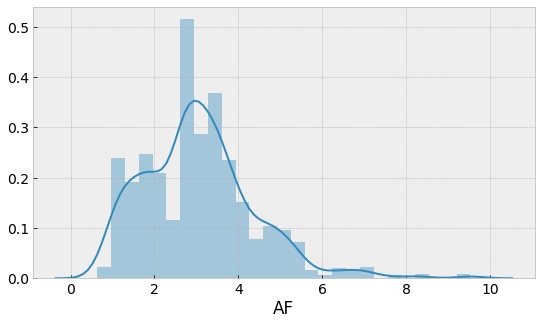

In [32]:
sns.distplot(max17)

In [33]:
# Max Input Power at 5 deg F, col AP
df.AP.describe()

count    1049.000000
mean        2.905972
std         1.251434
min         0.750000
25%         1.970000
50%         2.793660
75%         3.395520
max         8.353000
Name: AP, dtype: float64

In [34]:
# This rating is available.  Values are a bit less than those at 17 deg F.
# This combined with a COP can give us maximum output.

/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


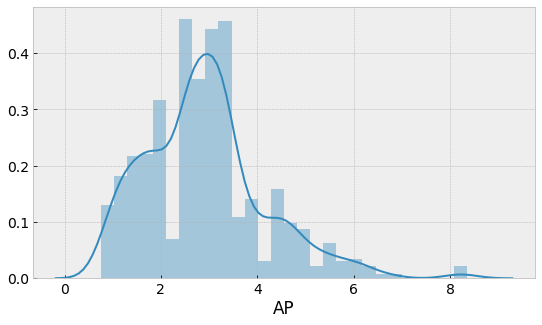

In [35]:
sns.distplot(df.AP)

## Conclusion
Should use Max Power at 5 deg F times a calculated COP to determine maximum capacity of the Heat Pump. Also need to put limits on the Max Power values, as there was one over 2,000 kW in 17 deg F data.  Max Power at 5 deg F is a bit less than Max Power at 17 deg F.

In [36]:
# COP at Coldest Temp, Max Capacity, column BK
df.BK.describe()

count    157.000000
mean       1.847781
std        0.283859
min        1.335937
25%        1.640000
50%        1.830000
75%        2.020000
max        2.870000
Name: BK, dtype: float64

/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


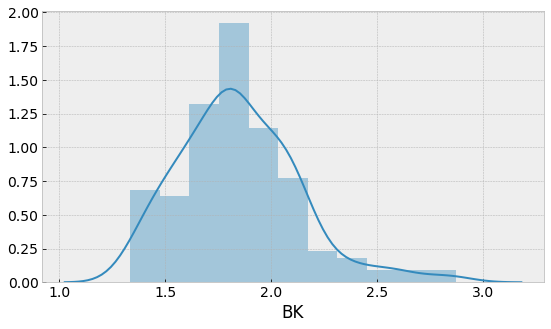

In [37]:
sns.distplot(df[~df.BK.isnull()].BK)

In [38]:
# Col M: Ducted or Ductless
df.M.value_counts()

Centrally Ducted    556
Ductless            489
Ductless              3
Ducted                1
Name: M, dtype: int64

Text(0,0.5,'HSPF')

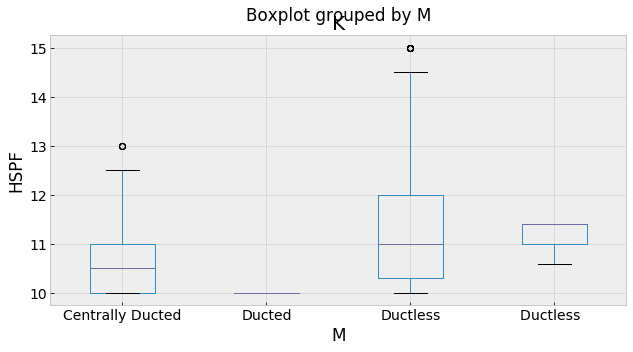

In [39]:
df.boxplot(column='K', by='M', rot=0, figsize=(10,5))
ylabel('HSPF')

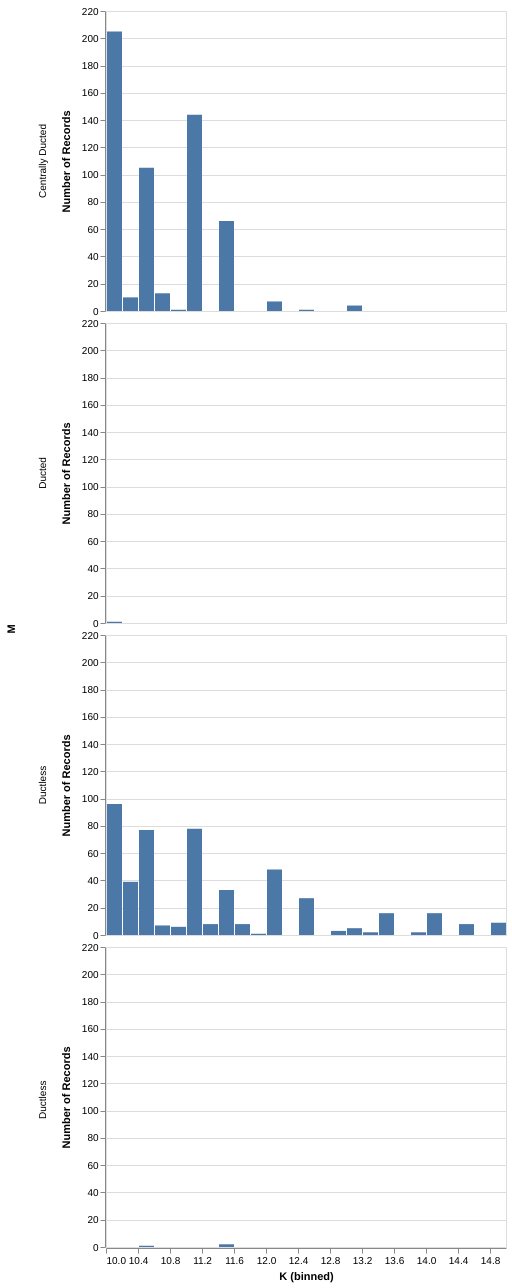

In [40]:
# HSPF by Ducted or Ductless
alt.Chart(df).mark_bar().encode(
    alt.X('K', bin=alt.Bin(maxbins=30)),
    y = 'count()',
    row = 'M'
)

In [41]:
df.query('M == "Centrally Ducted"').groupby('B').count()['C']

B
Amana                                      4
American Standard                         88
American Standard/Mitsubishi Electric      0
Bryant                                    14
Bryant® Heating and Cooling Systems      146
Carrier                                    0
Carrier® Air Conditioning                147
Daikin                                     4
Daikin                                     1
LG                                         0
Lennox                                     2
Maytag                                     4
Mitsubishi                                 2
SAMSUNG                                    2
Trane                                     42
Trane/Mitsubishi Electric                  0
York                                       0
Name: C, dtype: int64

In [42]:
df.query('M != "Centrally Ducted"')['O'].value_counts()

Non-ducted indoor units (Mini-splits)        323
Non-ducted indoor units                       60
Ducted Indoor Units                           18
Non-ducted indoor units (Wall Mount)          16
Mini-Splits                                   10
Mixed Ducted and Non-ducted indoor units       9
Ductless Highwall                              7
ducted indoor units (Mini-splits)              7
WALL/CEILING CASSETTE                          6
Non-Ducted                                     4
Non-ducted indoor units (Cassette)             4
Ducted Indoor Unit                             3
Non-ducted indoor Unit (Ceiling Cassette)      3
non-ducted indoor units                        3
Non-ducted indoor units (Floor Mount)          3
Mini-Split                                     2
MIXED DUCTED AND DUCTLESS                      2
ducted indoor units                            1
Non-ducted Highwall                            1
Name: O, dtype: int64

## Conclusion
The major manufacturers of ductless heat pumps don't make many Centrally Ducted
heat pumps.

Probably should filter down to just Ductless heat pumps for the rest of the graphs.

## Issue
Need to decide whether Ducted heat pumps should be included in the calculator.

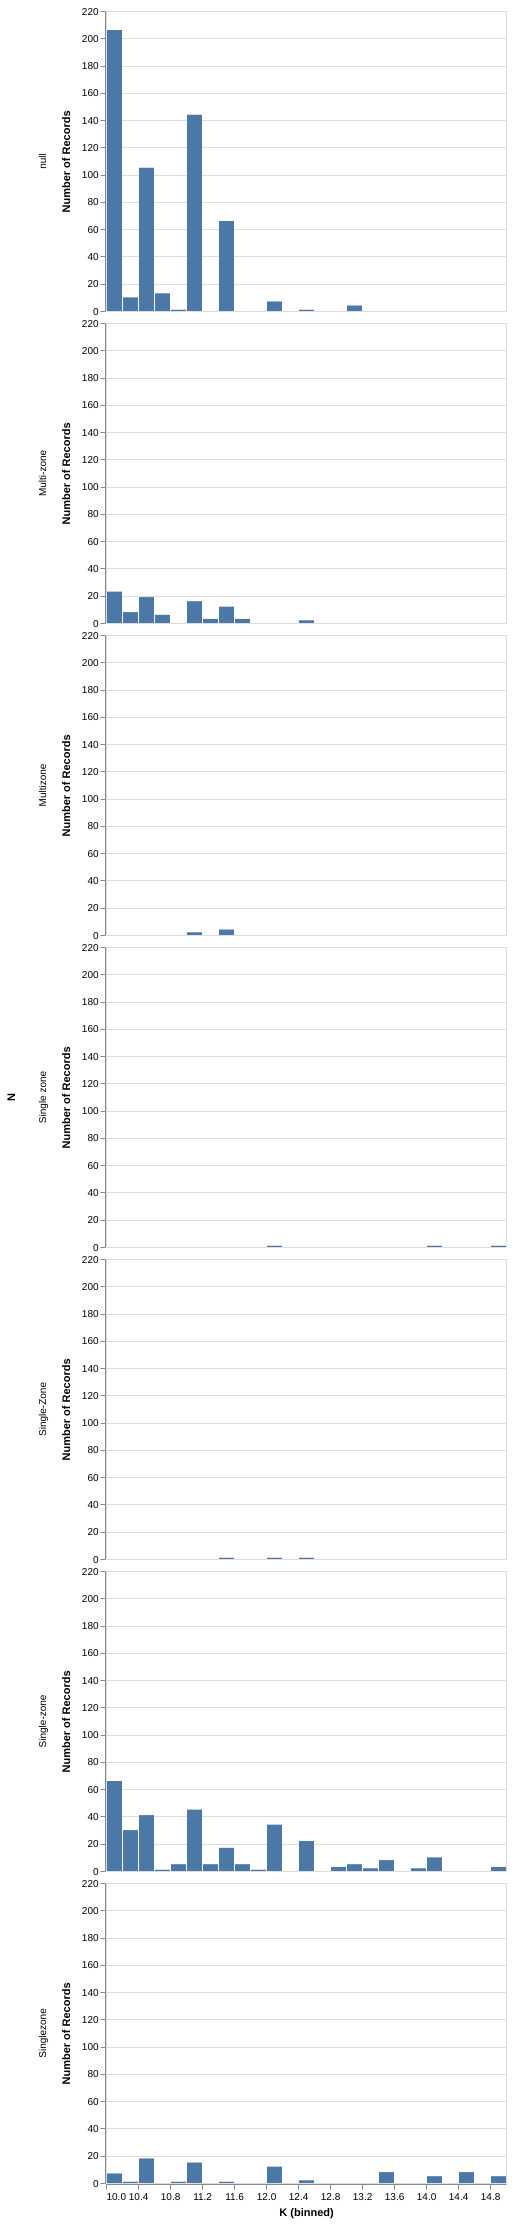

In [43]:
# Column N, multi zone or single if ductless
alt.Chart(df).mark_bar().encode(
    alt.X('K', bin=alt.Bin(maxbins=30)),
    y = 'count()',
    row = 'N'
)

## Conclusion
HSPF values are better for single-zone ductless heat pumps.

In [44]:
# Column L, Energy Star Certified
df.L.value_counts()

Yes    1049
Name: L, dtype: int64

## Conclusion
All of them are Energy Star certified.

## Correlation of HSPF to max-load COPs

In [9]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB',
       'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN',
       'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ',
       'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL'],
      dtype='object')

In [38]:
dfe = df.query('M != "Centrally Ducted"')[['K', 'X', 'Y', 'AH', 'AI', 'AS']]
dfe = dfe.rename(columns={'K': 'hspf', 'X': 'cop_rated_47', 'Y': 'cop_max_47',
                   'AH': 'cop_rated_17', 'AI': 'cop_max_17', 'AS': 'cop_max_5'})
print(dfe.head())
dfe.corr()

    hspf  cop_rated_47  cop_max_47  cop_rated_17  cop_max_17  cop_max_5
24  10.0      4.418610    2.579025      2.705759    2.473635   2.141159
25  10.0      3.968671    3.039256      3.126091    2.524474   2.150743
26  10.0      3.524272    2.719934      2.814413    2.243533   1.970871
59  15.0      4.470576    2.657178      2.200115    2.402111   2.080464
60  14.0      3.803688    3.425268      3.207940    2.637640   2.178222


hspf  cop_rated_47  cop_max_47  cop_rated_17  cop_max_17  \
hspf          1.000000      0.505043   -0.055998      0.210833   -0.034263   
cop_rated_47  0.505043      1.000000    0.210103      0.402851    0.142959   
cop_max_47   -0.055998      0.210103    1.000000     -0.015663    0.375608   
cop_rated_17  0.210833      0.402851   -0.015663      1.000000    0.169339   
cop_max_17   -0.034263      0.142959    0.375608      0.169339    1.000000   
cop_max_5     0.086787      0.151546    0.294975      0.221505    0.724415   

              cop_max_5  
hspf           0.086787  
cop_rated_47   0.151546  
cop_max_47     0.294975  
cop_rated_17   0.221505  
cop_max_17     0.724415  
cop_max_5      1.000000

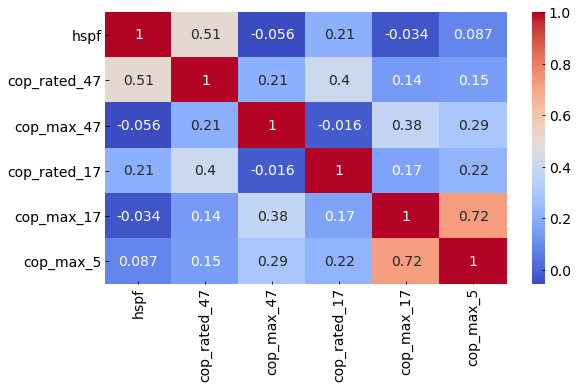

In [39]:
sns.heatmap(dfe.corr(), annot=True, cmap='coolwarm')

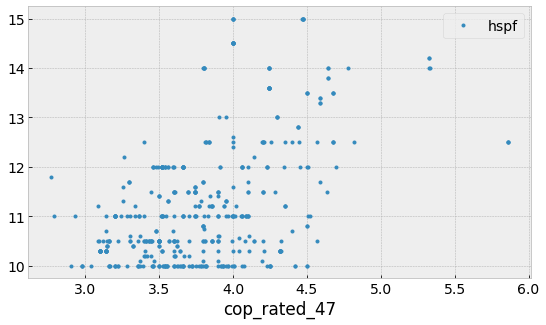

In [40]:
dfe.plot(x='cop_rated_47', y='hspf', style='.')

In [41]:
dfe.describe()

hspf  cop_rated_47  cop_max_47  cop_rated_17  cop_max_17  \
count  493.000000    493.000000  493.000000    493.000000  493.000000   
mean    11.268763      3.793778    3.166171      2.789614    2.384794   
std      1.250426      0.468311    0.464043      0.325232    0.348438   
min     10.000000      2.770000    2.085976      1.473557    1.761915   
25%     10.300000      3.497774    2.837130      2.613097    2.118552   
50%     11.000000      3.741333    3.140000      2.750000    2.320000   
75%     12.000000      4.060000    3.480000      2.920000    2.595772   
max     15.000000      5.860000    4.700000      5.229307    3.615743   

        cop_max_5  
count  493.000000  
mean     2.103426  
std      0.294388  
min      1.750000  
25%      1.893105  
50%      2.014809  
75%      2.226000  
max      2.937877

(0, 6)

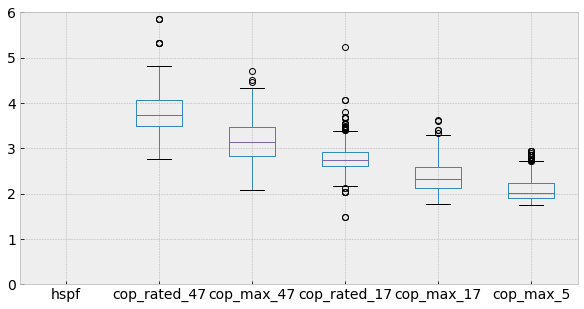

In [44]:
dfe.boxplot(figsize=(10,5))
ylim(0,6)

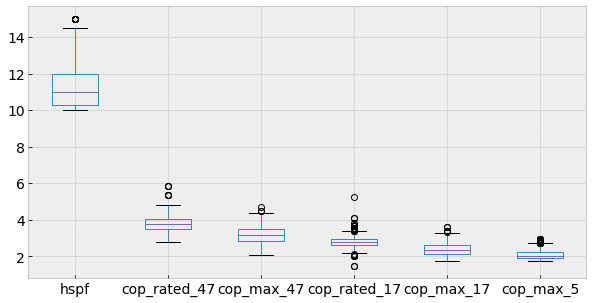

In [45]:
dfe.boxplot(figsize=(10,5))

## Conclusion

Best correlation of HSPF is with the rated COP at 47 F outdoor (corr = 0.51).  Not great correlations in general.

## How does Rated Power Compare at 47 and 17 F

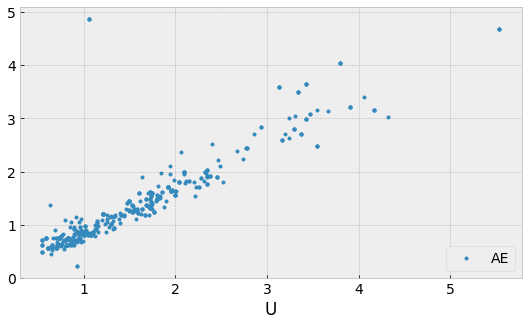

In [29]:
dfd = df.query('M != "Centrally Ducted"')
dfd.plot(x='U', y='AE', style='.')

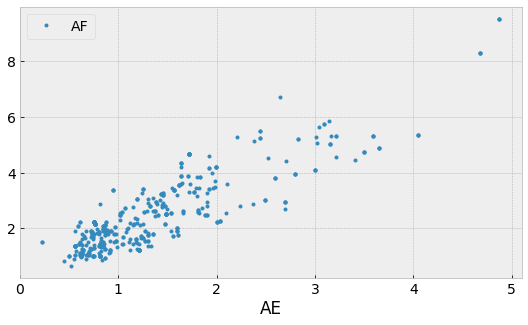

In [31]:
# Rated Power at 17F on X vs. Max Power at 17F on Y
dfd.plot(x='AE', y='AF', style='.')

## Custom Theme for Altair Charts

See:  https://altair-viz.github.io/user_guide/configuration.html#altair-themes

In [45]:
# define the theme by returning the dictionary of configurationsa
def larger():
    return {
        'config': {
            'view': {
                'height': 350,
                'width': 525,
            },
            'axis': {
                'labelFontSize': 14, 
                'titleFontSize': 16
            },
            'legend': {
                'labelFontSize': 12, 
                'titleFontSize': 14
            },
        }
    }

# register the custom theme under a chosen name
alt.themes.register('larger', larger)

# enable the newly registered theme
alt.themes.enable('larger')

ThemeRegistry.enable('larger')

### Notes

If you would like to use any theme just for a single chart, you can use the with statement to enable a temporary theme:

```python
with alt.themes.enable('default'):
    spec = chart.to_json()
```

If you want to restore the default theme, use:

```python
alt.themes.enable('default')
```

In [46]:
# Analyze Manuf. COP value at 5, 17, and 47 deg F at Maximum capacity
#df_cop = pd.DataFrame({'5 deg F': df.AS, '17 deg F': df.AI, '47 deg F': df.Y})
dfdu = df.query('M != "Centrally Ducted"')
df_cop = pd.DataFrame({5: dfdu.AS, 17: dfdu.AI, 47: dfdu.Y})
df_cop.dropna(inplace = True)

df_cop.describe()

5           17          47
count  493.000000  493.000000  493.000000
mean     2.103426    2.384794    3.166171
std      0.294388    0.348438    0.464043
min      1.750000    1.761915    2.085976
25%      1.893105    2.118552    2.837130
50%      2.014809    2.320000    3.140000
75%      2.226000    2.595772    3.480000
max      2.937877    3.615743    4.700000

In [47]:
dfc = df_cop.melt(value_vars=[5, 17, 47], var_name='temperature', value_name='cop')
dfc.head()

temperature       cop
0            5  2.141159
1            5  2.150743
2            5  1.970871
3            5  2.080464
4            5  2.178222

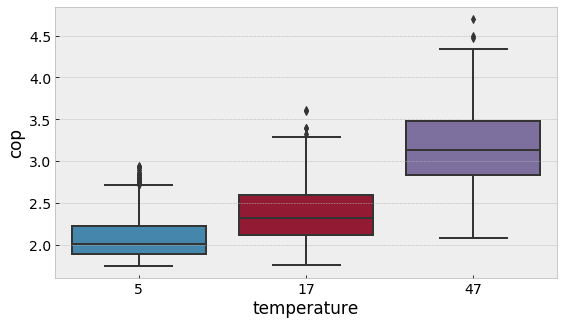

In [48]:
sns.boxplot(x="temperature", y="cop", data=dfc)
# Note that X axis is not spaced according to temperature value.

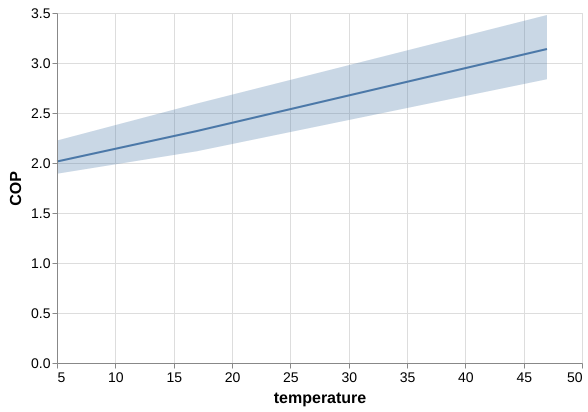

In [49]:
# Mean Values + 25th and 75th percentiles
line = alt.Chart(dfc).mark_line().encode(
    x = 'temperature',
    y = 'median(cop)'
)

middle_50 = alt.Chart(dfc).mark_area(opacity=0.3).encode(
    x='temperature',
    y=alt.Y('q1(cop)', axis=alt.Axis(title='COP')),
    y2='q3(cop)'
)
line + middle_50

In [50]:
cop_avgs = dfc.groupby('temperature').mean().reset_index()
cop_avgs['source'] = 'Manuf Spec, Max Load'
cop_avgs['field_study'] = False
cop_avgs.to_pickle('temp_cop_manuf_max.pkl')
cop_avgs

temperature       cop                source  field_study
0            5  2.103426  Manuf Spec, Max Load        False
1           17  2.384794  Manuf Spec, Max Load        False
2           47  3.166171  Manuf Spec, Max Load        False

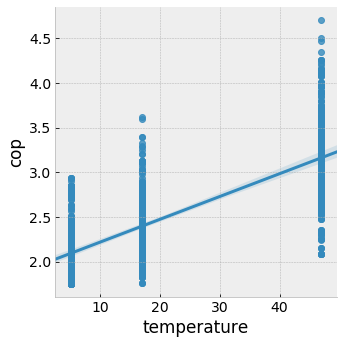

In [51]:
sns.lmplot(x="temperature", y="cop", data=dfc, ci=100)

## Conclusion
The median values look pretty close to what we measured on Phil's system, even though these are maximum capacity values.  The 47 deg F value probably won't be achieved due to cycling occurring before then.

In [52]:
# Analyze Manuf. Max Power value at 5, 17, and 47 deg F at Maximum capacity
df_pwr = pd.DataFrame({5: dfdu.AP, 17: dfdu.AF, 47: dfdu.V})
df_pwr.dropna(inplace = True)
dfp = df_pwr.melt(value_vars=[5, 17, 47], var_name='temperature', value_name='kW')
dfp = dfp.query('kW < 20')
dfp.head()

temperature     kW
0            5  1.095
1            5  1.131
2            5  2.290
3            5  1.720
4            5  1.790

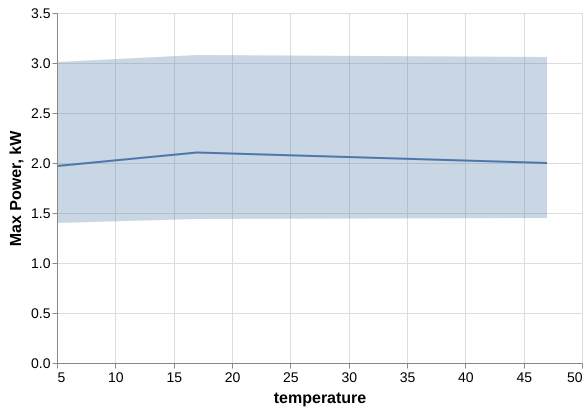

In [53]:
# Mean Values + 25th and 75th percentiles
line = alt.Chart(dfp).mark_line().encode(
    x = 'temperature',
    y = 'median(kW)'
)

middle_50 = alt.Chart(dfp).mark_area(opacity=0.3).encode(
    x='temperature',
    y=alt.Y('q1(kW)', axis=alt.Axis(title='Max Power, kW')),
    y2='q3(kW)'
)
line + middle_50

In [54]:
# Best Systems, K = HSPF, AP = Max Power at 5 deg F, AM = Max Capacity at 5 deg F
dfb = dfdu[['B', 'F', 'K', 'AP', 'AM']]
dfb.sort_values(by='K', ascending=False).head(30)

B                  F     K      AP       AM
661                Gree     SAP09HP230V1AO  15.0  1.8216  12976.6
1009              Trane    4TXK3809A10NUAA  15.0  1.7200  12210.0
303              Bryant       38MPRAQ09AA3  15.0  1.9360  13047.0
840               Midea       38MPRAQ09AA3  15.0  1.9360  13047.0
485             Carrier       38MPRAQ09AA3  15.0  1.9360  13047.0
686                Gree  GWH09YD-D3DNA1A/O  15.0  1.8200  12977.0
915               Payne       38MPRAQ09AA3  15.0  1.9360  13047.0
59    American Standard    4TXK3809A10NUAA  15.0  1.7200  12210.0
665               Tosot        TW09HQ3D6DO  15.0  1.8216  12976.6
494        COMFORTMAKER       DLCPRAH09AAK  14.5  1.9360  13047.0
932            TEMPSTAR       DLCPRAH09AAK  14.5  1.9360  13047.0
137            ARCOAIRE       DLCPRAH09AAK  14.5  1.9360  13047.0
698                HEIL       DLCPRAH09AAK  14.5  1.9360  13047.0
525         DAY & NIGHT       DLCPRAH09AAK  14.5  1.9360  13047.0
783            KEEPRITE       DLCPRAH09AAK  14.5  1.9360  13047.0
788             KENMORE       DLCPRAH09AAK  14.5  1.9360  13047.0
842               MIDEA       DLCPRAH09AAK  14.5  1.9360  13047.0
567             Fujitsu           AOU9RLS3  14.2  2.1000  15000.0
573             Fujitsu           AOU9RLS3  14.2  2.1000  15000.0
687                Gree  GWH12YD-D3DNA1A/O  14.0  0.8600   8000.0
568             Fujitsu          AOU9RLS3H  14.0  2.2500  15000.0
841               Midea       38MPRAQ12AA3  14.0  2.0740  12897.0
304              Bryant       38MPRAQ12AA3  14.0  2.0740  12897.0
916               Payne       38MPRAQ12AA3  14.0  2.0740  12897.0
575             Fujitsu          AOU12RLS3  14.0  2.1000  16500.0
666               Tosot        TW12HQ3D6DO  14.0  0.8600   8000.0
907           Panasonic         CU-XE9SKUA  14.0  1.7300  11000.0
563             Fujitsu          AOU12RLS3  14.0  2.1000  16500.0
486             Carrier       38MPRAQ12AA3  14.0  2.0740  12897.0
574             Fujitsu          AOU9RLS3H  14.0  2.2500  15000.0

## Sample Graph to show COPs collected from different sources.

In [55]:
d = {
    'COP': [2.2, 2.8, 3.5, 2.1, 2.7, 3.4],
    'Temperature': [5., 17., 47.]*2,
    'Source': ['ACEEE']*3 + ['CADMUS']*3,
    '# of Units': [8]*3 + [13]*3,
    'Study Type': ['field']*3 + ['spec']*3,
    'Selected': [1]*3 + [0]*3,
}
dfp = pd.DataFrame(d)
dfp

COP  Temperature  Source  # of Units Study Type  Selected
0  2.2          5.0   ACEEE           8      field         1
1  2.8         17.0   ACEEE           8      field         1
2  3.5         47.0   ACEEE           8      field         1
3  2.1          5.0  CADMUS          13       spec         0
4  2.7         17.0  CADMUS          13       spec         0
5  3.4         47.0  CADMUS          13       spec         0

Experiments below to set the opacity of the line so as to highlight one line but still show the entire set of lines, but dimmed out.

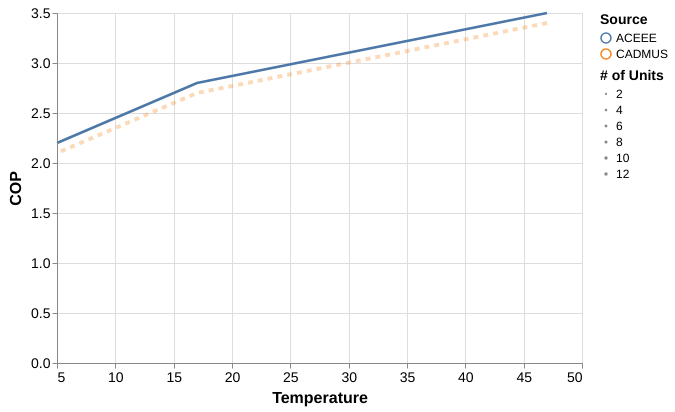

In [56]:
line1 = alt.Chart(dfp[dfp['Study Type']=='field']).mark_line().encode(
    x = 'Temperature',
    y = 'COP',
    color = 'Source',
    size = '# of Units',
    opacity = alt.value(1.0),
    #opacity = 'Selected:N',
)
line2 = alt.Chart(dfp[dfp['Study Type']=='spec']).mark_line(strokeDash=[5,5]).encode(
    x = 'Temperature',
    y = 'COP',
    color = 'Source',
    size = '# of Units',
    opacity = alt.value(0.3),
    #opacity = 'Selected:N',
)
line1 + line2

## COP vs. Temperature assuming Varying Load

This looks at all the ductless heat pumps in the dataset and calculates the COP
at 5 F, 17 F, and 47 F assuming the load on the heat pump varies due to varying
outdoor temperature.  To determine the load variation, assume that the load on the
heat pump equals the heat pump's 5 F Maximum Capacity when it is 10 F outdoors.
Vary the load from that level assuming the balance point of the home is 60 F.

In [57]:
def interp(actual_load, load1, load2, cop1, cop2):
    """Interpolates COP between 'cop1' and 'cop2' when 'actual_load' is
    between load1 and load2.
    """
    return (actual_load - load1)/(load2 - load1) * (cop2 - cop1) + cop1

In [58]:
dfdu = df.query('M != "Centrally Ducted"')

# Possibly filter down to selected units
filter = True     # set to True if you want to filter, False otherwise
selected_ahri = (
    7993243,    # Fujitsu 15RLS3
    4934170,    # Mitsu MUZ-FE12NA
    4908219,    # Mitsu MUZ-FE09NA
)

temperatures = []
cops = []
for ix, row in dfdu.iterrows():
    
    # If filtering of the heat pump is requested, do it.
    if filter:
        if row.D not in selected_ahri:
            continue
    
    # Assume that load on heat pump reaches the 5 F Maximum Capacity
    # at an outdoor temperature of 10 F.
    max_out_5 = row.AM
    
    # Therefore, heat pump outputs Max Capacity at 5 degree F outdoors
    temperatures.append(5.0)
    cops.append(row.AS)
    
    # COP at 17 F.  First, calc load at 17 F
    load = (60. - 17.) / (60. - 10.) * max_out_5
    
    # if it is below minimum load, don't add a point because we don't
    # know how to use specs to determine cycling COPs.
    if load >= row.AA:
        if load < row.AB:
            # interpolate COP
            cop = interp(load, row.AA, row.AB, row.AG, row.AH)
        elif load < row.AC:
            cop = interp(load, row.AB, row.AC, row.AH, row.AI)
        else:
            cop = row.AI
        
        temperatures.append(17.0)
        cops.append(cop)

    # COP at 47 F.  First, calc load at 47 F
    load = (60. - 47.) / (60. - 10.) * max_out_5
    
    # if it is below minimum load, don't add a point because we don't
    # know how to use specs to determine cycling COPs.
    if load >= row.Q:
        if load < row.R:
            # interpolate COP
            cop = interp(load, row.Q, row.R, row.W, row.X)
        elif load < row.S:
            cop = interp(load, row.R, row.S, row.X, row.Y)
        else:
            cop = row.Y
        
        temperatures.append(47.0)
        cops.append(cop)
        

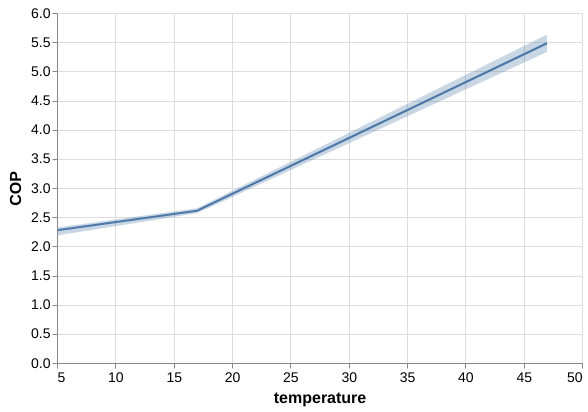

In [59]:
dfl = pd.DataFrame({'temperature': temperatures, 'cop': cops})

# Mean Values + 25th and 75th percentiles
line = alt.Chart(dfl).mark_line().encode(
    x = 'temperature',
    y = 'mean(cop)'
)

middle_50 = alt.Chart(dfl).mark_area(opacity=0.3).encode(
    x='temperature',
    y=alt.Y('q1(cop)', axis=alt.Axis(title='COP')),
    y2='q3(cop)'
)
line + middle_50

In [60]:
dfl.describe()

temperature       cop
count     8.000000  8.000000
mean     20.000000  3.202715
std      17.566201  1.426858
min       5.000000  2.180000
25%       5.000000  2.392500
50%      17.000000  2.566233
75%      24.500000  3.318786
max      47.000000  5.777641

In [61]:
cop_avgs = dfl.groupby('temperature').mean().reset_index()
cop_avgs['source'] = 'Manuf Spec, Varying Load'
cop_avgs['field_study'] = False
cop_avgs.to_pickle('temp_cop_manuf_varying.pkl')
cop_avgs

temperature       cop                    source  field_study
0          5.0  2.276667  Manuf Spec, Varying Load        False
1         17.0  2.609744  Manuf Spec, Varying Load        False
2         47.0  5.481243  Manuf Spec, Varying Load        False